<a href="https://colab.research.google.com/github/cheul0518/DeepLearning/blob/main/Vision_AIHUB/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Data preparation

In [2]:
# Bring datasets, and split them (keras.datasets.mnist.load_data() returns tuples of train and test datasets)
(trainX, trainY), (testX, testY) = keras.datasets.mnist.load_data()

print(type(trainX))
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

<class 'numpy.ndarray'>
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
# Check Label/target
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

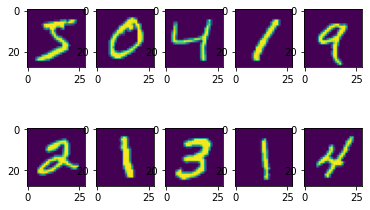

In [4]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(trainX[i])
plt.show()

In [5]:
print(trainY[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [6]:
# Reshape train X and testX from (60000, 28, 28), (10000, 28, 28)to (60000, 28*28), (10000, 28*28) respectively
trainX = trainX.reshape((60000, 28*28))
testX = testX.reshape((10000, 28*28))

# Normalization/transformation
"""Do not always just divide variables randomly to make it smaller in any case.
For image classification, dividing by 255 works good because the whole range is in [0,1]
"""
trainX = trainX / 255
testX = testX / 255

### Model

#### Model layout

In [7]:
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(28*28,)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


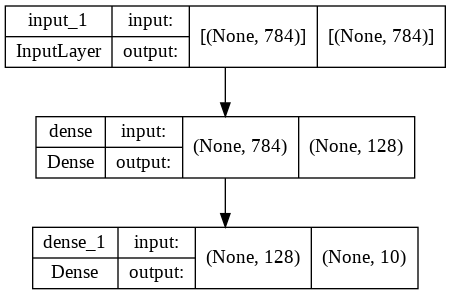

In [8]:
keras.utils.plot_model(model, show_shapes=True)

In [9]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Learning

In [10]:
hist = model.fit(trainX, trainY, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2541 - accuracy: 0.9275
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1126 - accuracy: 0.9666
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0786 - accuracy: 0.9759
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0586 - accuracy: 0.9820
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0455 - accuracy: 0.9860
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0350 - accuracy: 0.9890
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0294 - accuracy: 0.9908
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0227 - accuracy: 0.9931
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0199 - accuracy: 0.9935
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.01

### Model evaluation

In [11]:
model.evaluate(testX,testY) # Loss and accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9805


[0.0867641270160675, 0.9804999828338623]

In [12]:
print(hist.history['loss'])
print(hist.history['accuracy'])

[0.25413739681243896, 0.11263673007488251, 0.07859514653682709, 0.05861738324165344, 0.04549570754170418, 0.03496232256293297, 0.029357507824897766, 0.022732064127922058, 0.01993265561759472, 0.015815075486898422, 0.01347314938902855, 0.011669320985674858, 0.010362988337874413, 0.008518913760781288, 0.008226289413869381]
[0.9274666905403137, 0.9665666818618774, 0.9759166836738586, 0.9819999933242798, 0.9859833121299744, 0.9889666438102722, 0.9908166527748108, 0.9931333065032959, 0.9935166835784912, 0.9954666495323181, 0.9956333041191101, 0.996399998664856, 0.9968000054359436, 0.9975166916847229, 0.9973000288009644]


(0.0, 3.0)

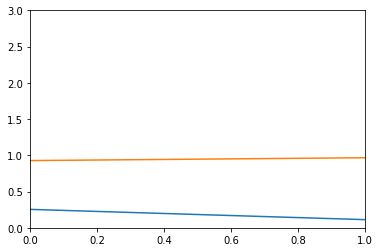

In [26]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.xlim([0,1])
plt.ylim([0,3])

In [14]:
# Check f1, precision, and recall
from sklearn.metrics import f1_score, precision_score, recall_score
preds = model.predict(testX)
pred = np.argmax(preds,axis=1)

print("Macro")
print(f"Precision: {precision_score(testY, pred, average='macro'):.2f}")
print(f"Recall: {recall_score(testY, pred, average='macro'):.2f}")
print(f"F1: {f1_score(testY, pred, average='macro'):.2f}")
"""Difference between Macro and Micro
A macro average computes the metric independently for each class and then take the average, therefore treaing all classes equally
A micro-average aggregates the contribution of all classes to compute the average metric
For detail: https://datascience.stackexchange.com/a/24051
"""
print("Micro")
print(f"Precision: {precision_score(testY, pred, average='micro'):.2f}")
print(f"Recall: {recall_score(testY, pred, average='micro'):.2f}")
print(f"F1: {f1_score(testY, pred, average='micro'):.2f}")

Macro
Precision: 0.98
Recall: 0.98
F1: 0.98
Micro
Precision: 0.98
Recall: 0.98
F1: 0.98


In [15]:
preds = model.predict(testX)
print(preds[0])
print(np.argmax(preds[0]))

[5.7267526e-13 9.8023184e-16 1.0748359e-12 1.5421023e-09 3.5609386e-21
 4.5968465e-17 5.3880265e-19 1.0000000e+00 6.4506785e-15 4.7659658e-12]
7


7


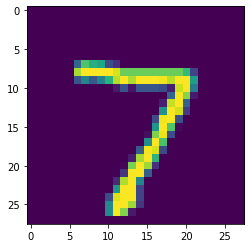

In [16]:
print(testY[0])
plt.imshow(testX[0].reshape(28, 28))
plt.show()

#### Model 2 

In [17]:
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(28*28)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


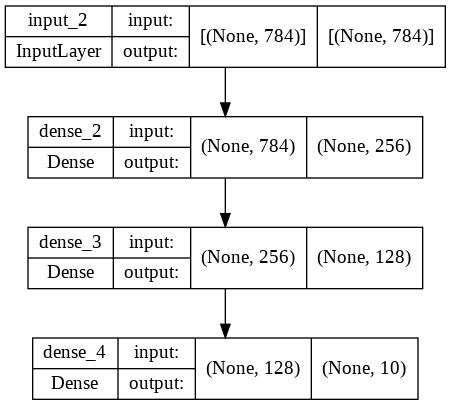

In [19]:
keras.utils.plot_model(model, show_shapes=True)

In [20]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#### Learning

In [21]:
hist2 = model.fit(trainX, trainY, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2035 - accuracy: 0.9394
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0853 - accuracy: 0.9729
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0585 - accuracy: 0.9808
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0431 - accuracy: 0.9863
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0341 - accuracy: 0.9889


#### Evaluation

In [22]:
model.evaluate(testX, testY)

313/313 [==============================] - 1s 2ms/step - loss: 0.0746 - accuracy: 0.9790


[0.0745936781167984, 0.9789999723434448]

In [23]:
print(hist2.history['loss'])
print(hist2.history['accuracy'])

[0.20352709293365479, 0.08530720323324203, 0.05849601700901985, 0.04313574731349945, 0.03412526100873947]
[0.9394333362579346, 0.9728833436965942, 0.9807999730110168, 0.9862833619117737, 0.9888666868209839]


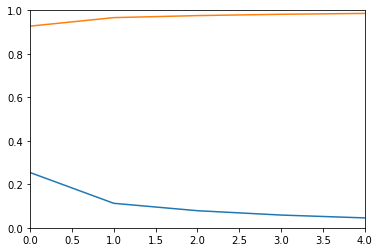

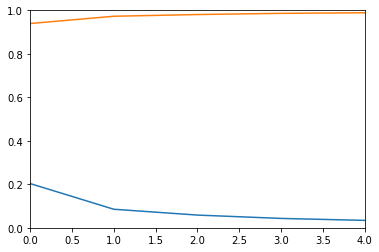

In [25]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.xlim([0,4])
plt.ylim([0,1])
plt.figure()
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['accuracy'])
plt.xlim([0,4])
plt.ylim([0,1])
plt.show()